In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','syntheticMRI2D','coronal', 'toy-cleaned')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 9

In [2]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            


In [3]:
def normalize(image):
    image = image.astype(np.float32)
    return (image - np.nanmean(image)) / np.nanstd(image)

In [4]:
coronal_wv = convert_to_wavelet_basis(data_dir, "gray", image_func = normalize, debug=True, image_opener = npz_opener)


coronal_wv['data'] = coronal_wv['data'].apply(lambda x: x[~np.isnan(x)])
coronal_wv['size'] = coronal_wv['data'].apply(lambda x : len(x))
coronal_wv

9 layers being used


100%|██████████| 999/999 [00:03<00:00, 293.07it/s]


,channel,layer,frequency,orientation,data,size
0,gray,1,0.110679,L1,[],0
1,gray,2,0.124514,D,[],0
2,gray,2,0.124514,H,[],0
3,gray,2,0.124514,V,[],0
4,gray,3,0.142301,D,"[-1.0195079, 4.7529263, 12.378216, -0.67249703...",1954
5,gray,3,0.142301,H,"[-12.117907, -1.8857484, -2.7841306, -7.616997...",1954
6,gray,3,0.142301,V,"[25.00415, 23.255856, 19.58305, 12.421746, 26....",1954
7,gray,4,0.166018,D,"[-2.3648415, -6.9491696, 2.1280136, 6.721238, ...",17764
8,gray,4,0.166018,H,"[-21.260845, 1.3918118, -20.246778, -13.54037,...",17764
9,gray,4,0.166018,V,"[25.262733, -14.184609, -1.659297, 15.883956, ...",17764


In [5]:
coronal_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = coronal_wv[coronal_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    coronal_df = pd.concat([coronal_df, ks_df], axis = 0)
coronal_df

C:\Users\riyap\AppData\Local\Temp\ipykernel_8844\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_8844\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_8844\1673488915.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
C:\Users\riyap\AppData\Local\Temp\ipykernel_8844\1670323507.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA colum

,Layer,First,Second,KS_Stat,Pvalue
0,2,D,H,NaN,NaN
1,2,D,V,NaN,NaN
2,2,H,V,NaN,NaN
0,3,D,H,0.409928,2.818004e-147
1,3,D,V,0.656090,0.000000e+00
2,3,H,V,0.798362,0.000000e+00
2,4,H,V,0.087199,3.289196e-59
0,4,D,H,0.152331,2.029554e-180
1,4,D,V,0.236827,0.000000e+00
2,5,H,V,0.053602,6.549723e-103


c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:514: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:515: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:514: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\riyap\OneDrive\Documents\GitHub\hierarchical-bayesian-model-validation\utilities\plotting.py:515: UserW

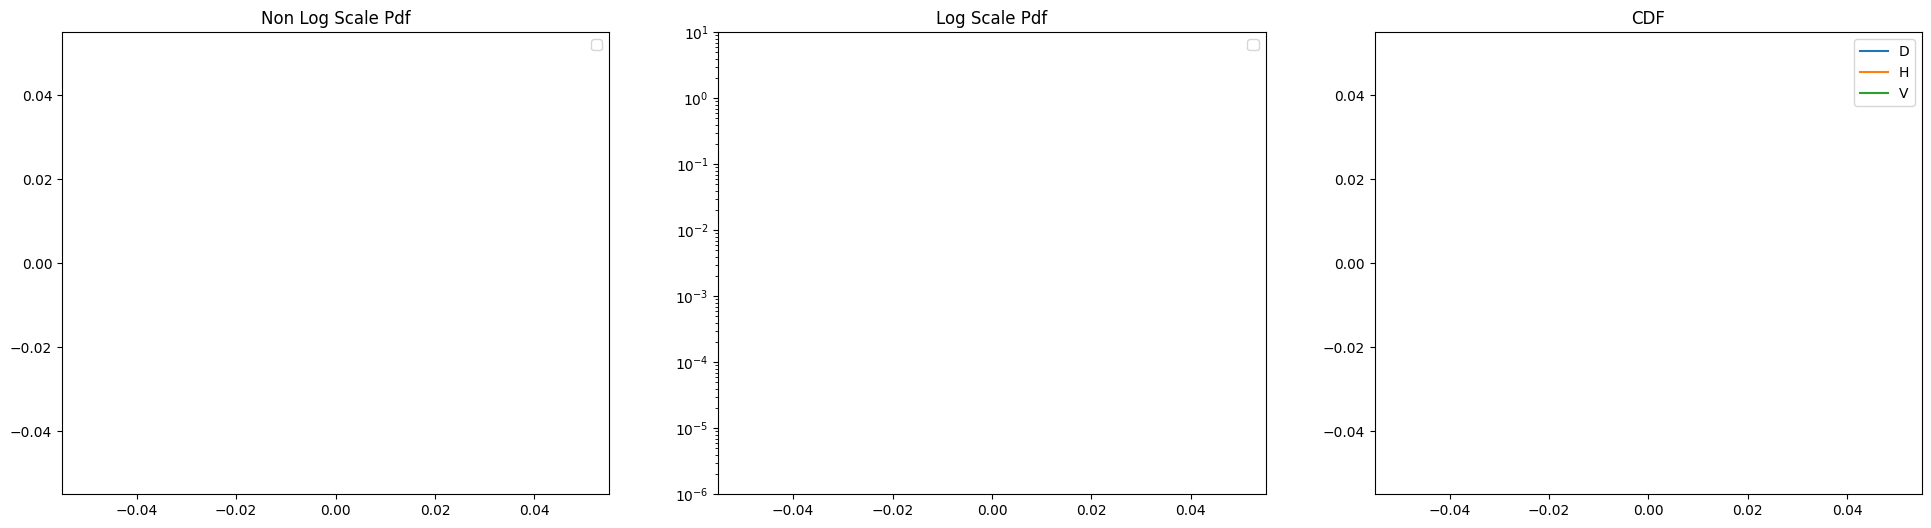

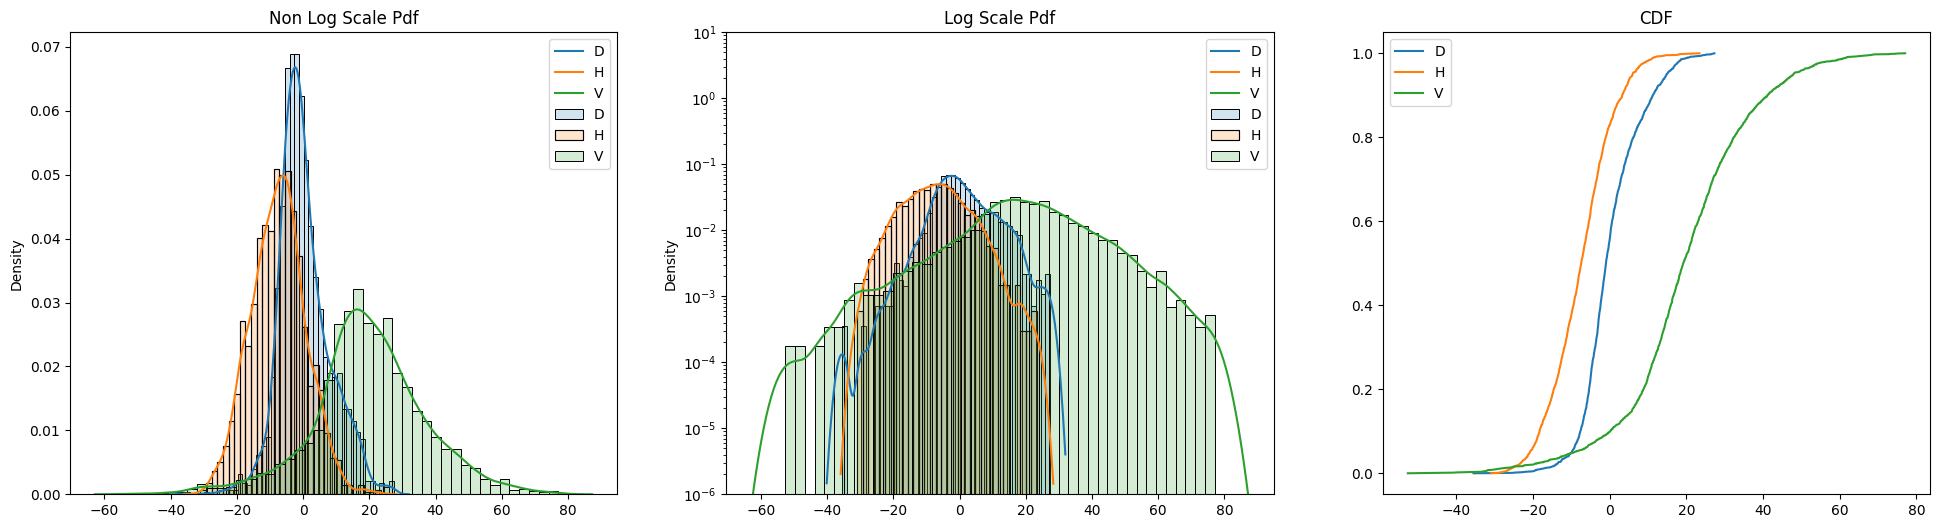

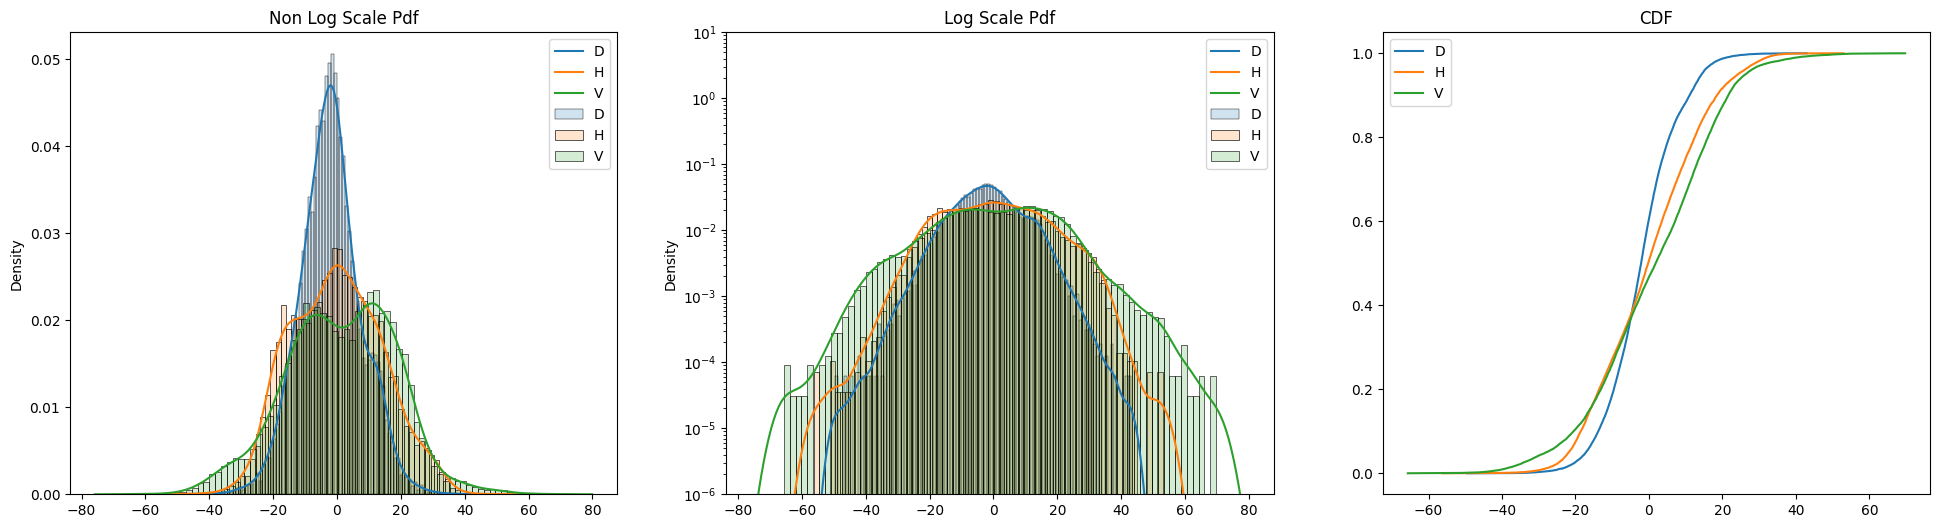

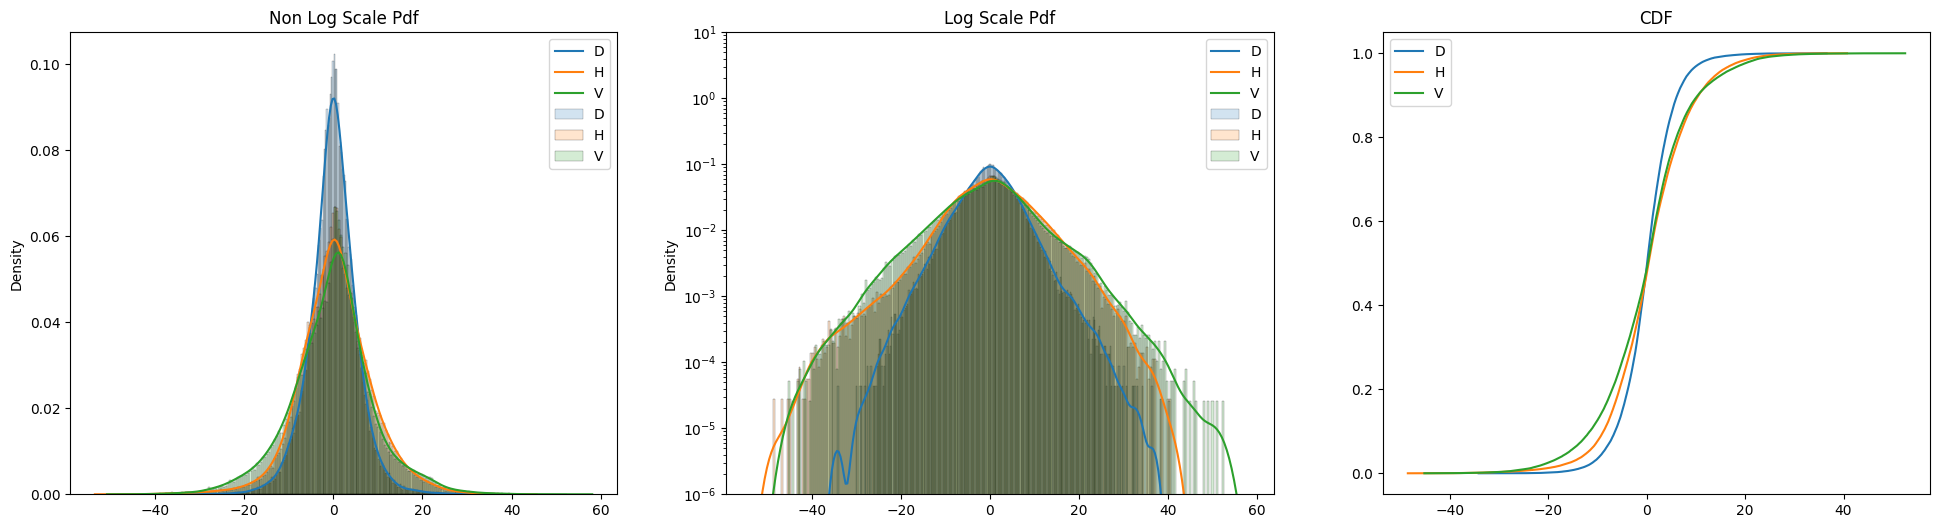

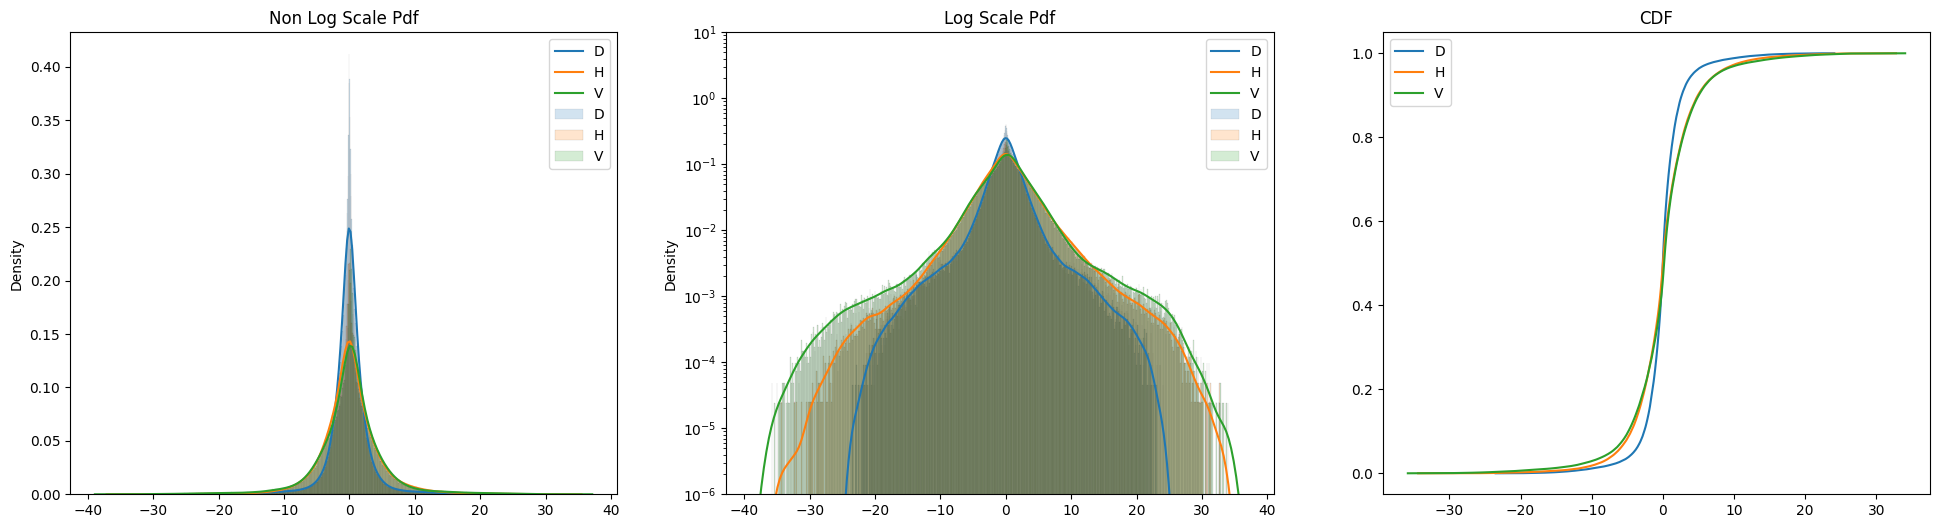

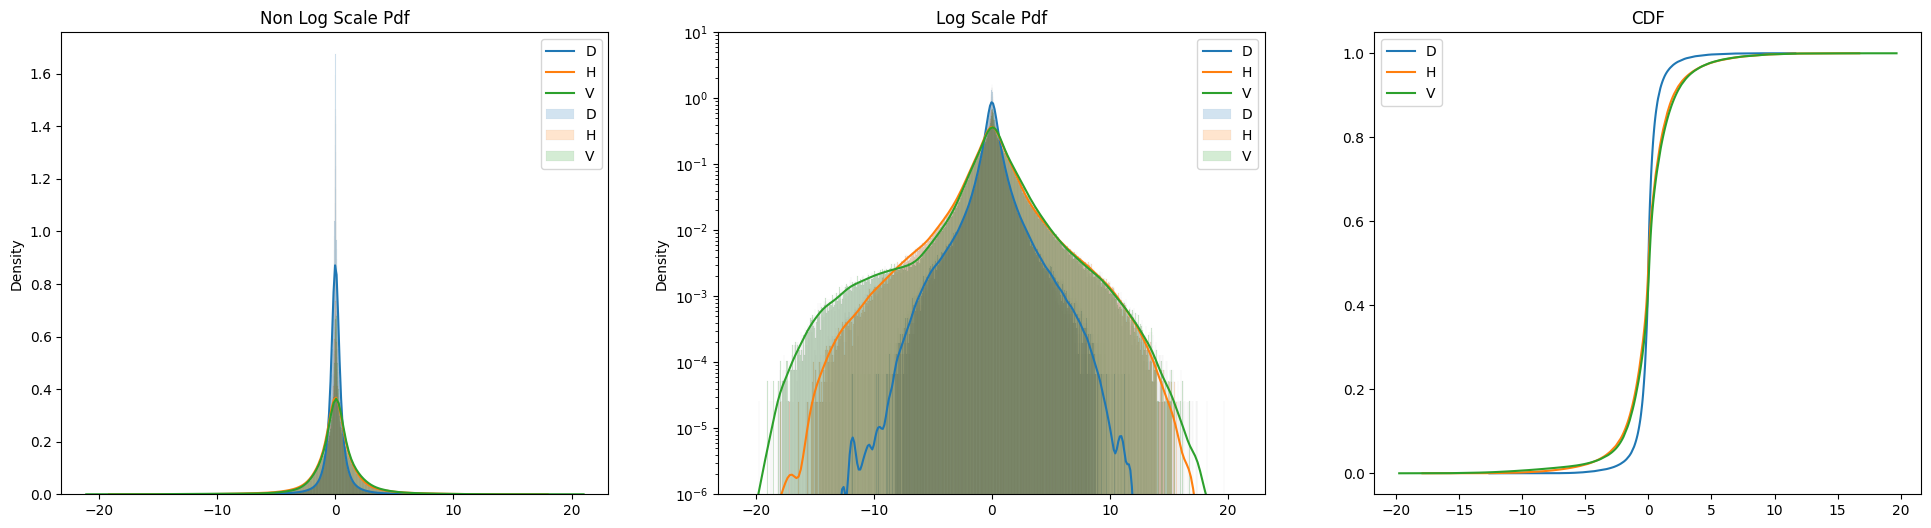

c:\Users\riyap\anaconda3\envs\HBMV\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


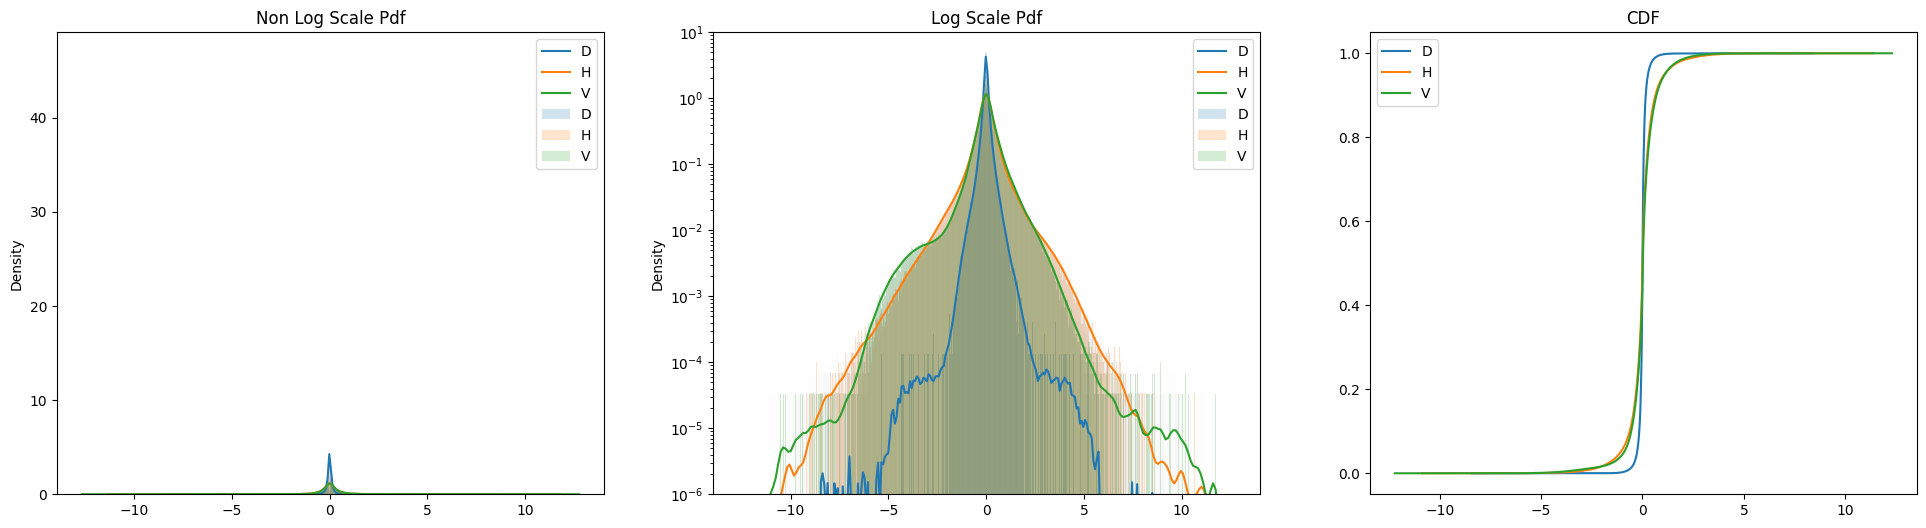

In [6]:
for i in range(2, LAYER_MAX):
    layer_df = coronal_wv[coronal_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)